# Description


##### https://www.kaggle.com/c/titanic




### Data Dictionary


| Variable       | Definition    | key |
| -------------  |:-------------:|:----:|
| survival       | Survival      | 0 = No, 1 = Yes |
| pclass         | Ticket class  | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex            | Sex           ||
| Age            | Age in years  ||
| sibsp          | # of siblings / spouses aboard the Titanic ||
|parch           | # of parents / children aboard the Titanic ||
|ticket          | Ticket number ||
|fare            | Passenger fare || 
|cabin           | Cabin number || 
|embarked        | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [267]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load Data

In [268]:
df_train = pd.read_csv('data/train.csv', index_col='PassengerId')

# Analyzing data

In [269]:
df_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


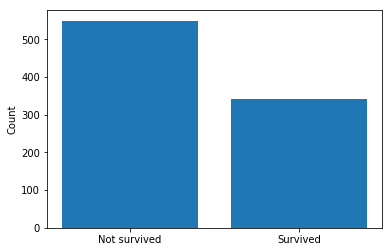

In [270]:
plt.bar([0,1], df_train["Survived"].value_counts())
plt.xticks([0,1], ["Not survived", "Survived"])
plt.ylabel("Count")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ef1542358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8ef13f3be0>]], dtype=object)

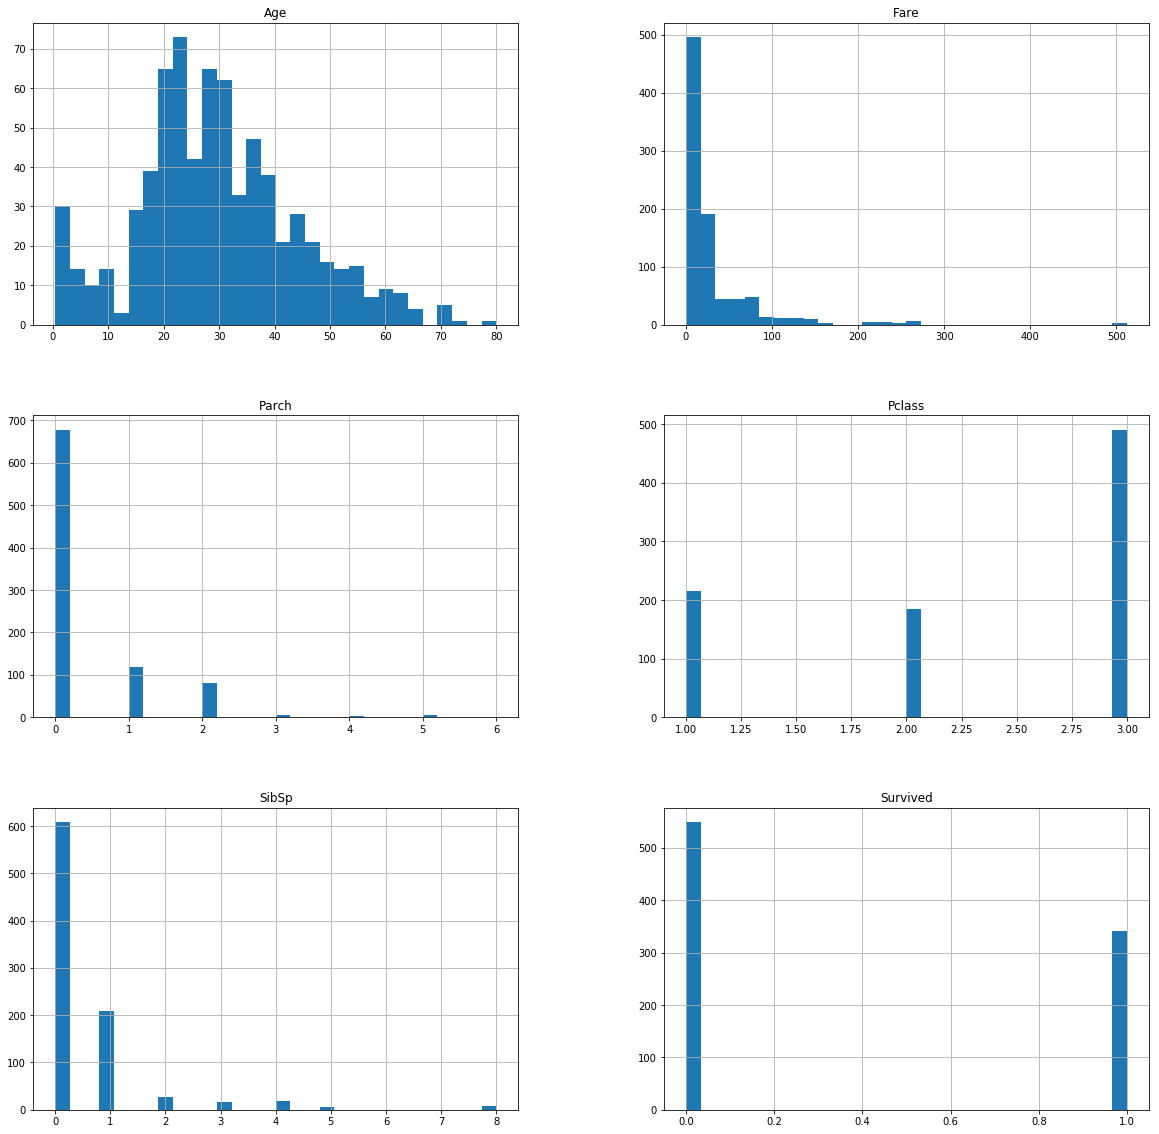

In [417]:
df_train.hist(bins=30, figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ef8a69828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8ef887f6a0>]], dtype=object)

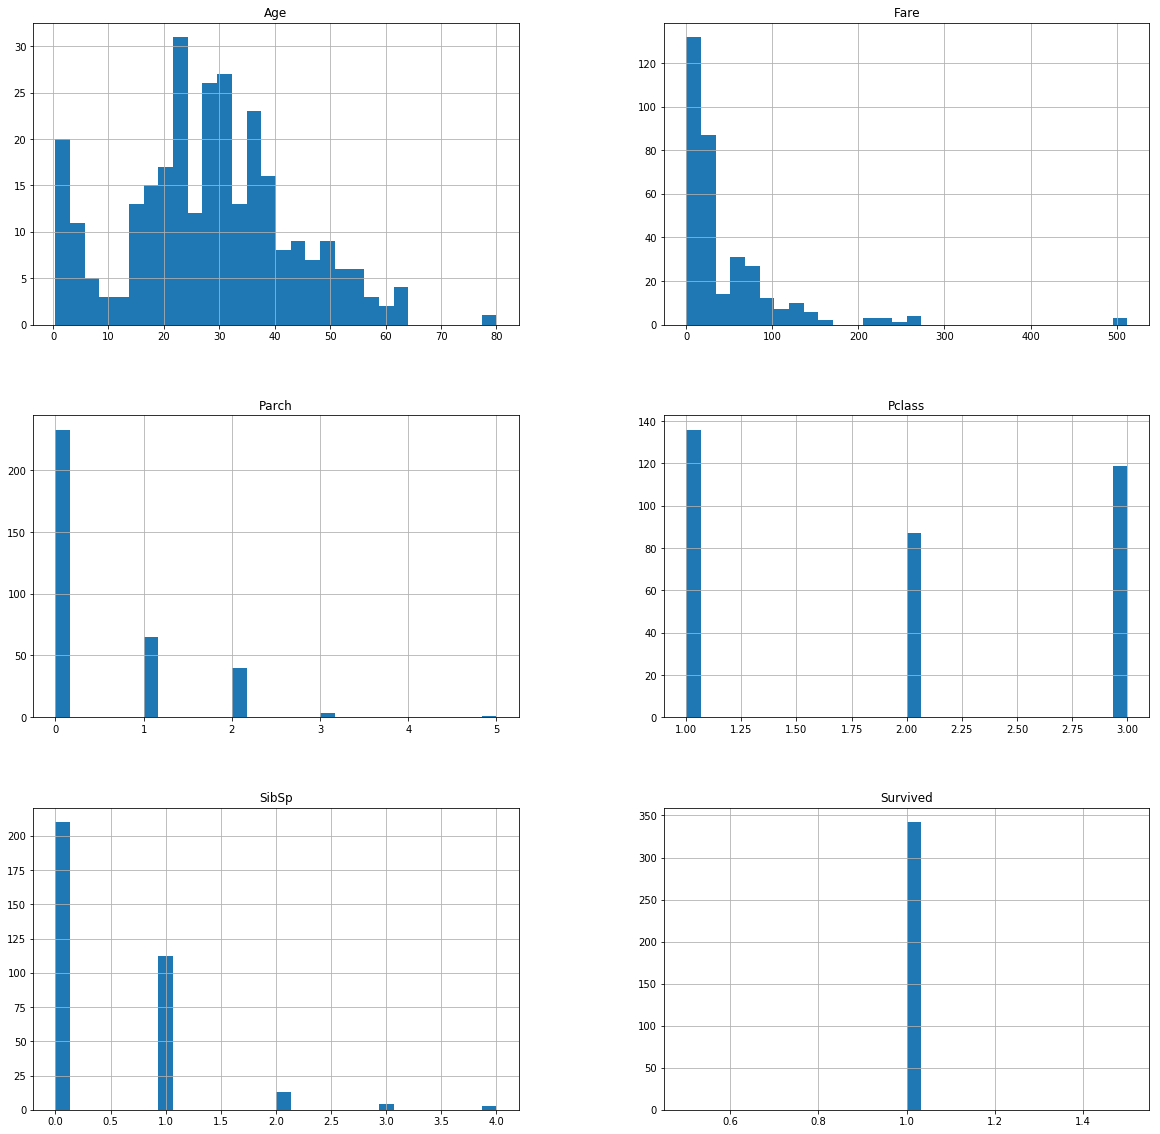

In [272]:
df_survived = df_train[df_train["Survived"] == 1]
df_survived.hist(bins=30, figsize=(20,20))

In [273]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [274]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [275]:
corr_matrix = df_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

##### First analysis :
* Essa primeira análise parece indicar que existe uma certa correlação entre os sobreviventes e a riqueza do passageiro (provavelmente devido a classe e cabine em que estava)
* A classe tem correlação inversa com a probabilidade de sobrevivência (na 1ª teria mais chance do que na 3ª).
* Os itens idade e número de parentes (SibsSp e Parch) não aparentam tem correlação com a taxa de sobrevivencia (o que não parece correto, indicando que é necessário maior análise sobre esses dados).


## Clean data

In [276]:
titanic = df_train.copy()

In [450]:
# Classe do scikit-learn para lidar com missing values
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="most_frequent")

# O Imputer so calcula média sobre valores numéricos
# Copia do dados sem atributo ocean_proximity
titanic_num = titanic.drop(["Name", "Ticket", "Cabin", "Embarked", "Sex", "Pclass"], axis=1)

imputer.fit(titanic_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
    verbose=0)

In [451]:
X = imputer.transform(titanic_num)
titanic_num = pd.DataFrame(X, columns=titanic_num.columns)

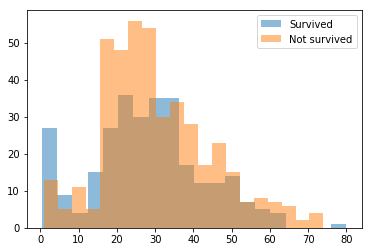

In [470]:
#Original age data

x = df_train["Age"][df_train["Survived"] == 1]
y = df_train["Age"][df_train["Survived"] == 0]

x = x.dropna()
y = y.dropna()

plt.hist(x.values, bins=20, alpha=0.5, label='Survived')
plt.hist(y.values, bins=20, alpha=0.5, label='Not survived')
plt.legend(loc='upper right')
plt.show()


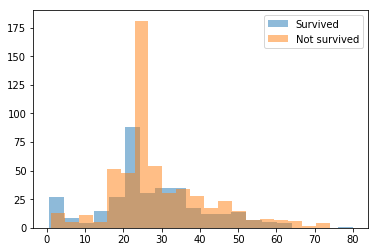

In [469]:
#Age data after replace missing values

x = titanic_num["Age"][titanic_num["Survived"] == 1]
y = titanic_num["Age"][titanic_num["Survived"] == 0]


plt.hist(x.values, bins=20, alpha=0.5, label='Survived')
plt.hist(y.values, bins=20, alpha=0.5, label='Not survived')
plt.legend(loc='upper right')
plt.show()

#### Categorical data

In [281]:
df_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [282]:
df_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [418]:
sex_cat = titanic["Sex"]
sex_encoded, sex_categories = sex_cat.factorize()
sex_df = pd.DataFrame(sex_encoded, columns=["Male"])

titanic_num = pd.concat([titanic_num, sex_df], axis=1)
titanic_num.head()

,Survived,Age,SibSp,Parch,Fare,Male,S,C,Q,3rd,...,CabF,CabG,NameSize,nNames,Master,Miss,Mr,Mrs,Name(),Male
0,0.0,22.0,1.0,0.0,7.2500,0,1.0,0.0,0.0,1.0,...,0,0,23,4,0,0,1,0,0,0
1,1.0,38.0,1.0,0.0,71.2833,1,0.0,1.0,0.0,0.0,...,0,0,51,7,0,0,1,1,1,1
2,1.0,26.0,0.0,0.0,7.9250,1,1.0,0.0,0.0,1.0,...,0,0,22,3,0,1,0,0,0,1
3,1.0,35.0,1.0,0.0,53.1000,1,1.0,0.0,0.0,0.0,...,0,0,44,7,0,0,1,1,1,1
4,0.0,35.0,0.0,0.0,8.0500,0,1.0,0.0,0.0,1.0,...,0,0,24,4,0,0,1,0,0,0


In [284]:
embarked_cat = titanic["Embarked"]
embarked_cat = embarked_cat.fillna(embarked_cat.value_counts().index[0])
embarked_encoded, embarked_categories = embarked_cat.factorize()
embarked_encoded[:10]

array([0, 1, 0, 0, 0, 2, 0, 0, 0, 1])

In [285]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
embarked_1hot = encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot

<891x3 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [286]:
embarked_num = embarked_1hot.toarray()
embarked_num = pd.DataFrame(embarked_num, columns=embarked_categories)
embarked_num.head()

,S,C,Q
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [287]:
titanic_num = pd.concat([titanic_num, embarked_num], axis=1)
titanic_num.head()

,Survived,Age,SibSp,Parch,Fare,Male,S,C,Q
0,0.0,22.0,1.0,0.0,7.2500,0,1.0,0.0,0.0
1,1.0,38.0,1.0,0.0,71.2833,1,0.0,1.0,0.0
2,1.0,26.0,0.0,0.0,7.9250,1,1.0,0.0,0.0
3,1.0,35.0,1.0,0.0,53.1000,1,1.0,0.0,0.0
4,0.0,35.0,0.0,0.0,8.0500,0,1.0,0.0,0.0


In [288]:
corr_matrix = titanic_num.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Male        0.543351
Fare        0.257307
C           0.168240
Parch       0.081629
Q           0.003650
SibSp      -0.035322
Age        -0.064910
S          -0.149683
Name: Survived, dtype: float64

In [289]:
# transformar isso numa função

class_cat = titanic["Pclass"]
class_cat = class_cat.fillna(class_cat.value_counts().index[0])
class_encoded, class_categories = class_cat.factorize()
class_encoded[:10]

encoder = OneHotEncoder()
class_1hot = encoder.fit_transform(class_encoded.reshape(-1,1))
embarked_1hot

class_categories = ["3rd", "2nd", "1st"]
class_num = class_1hot.toarray()
class_num = pd.DataFrame(class_num, columns=class_categories)
class_num.head()

titanic_num = pd.concat([titanic_num, class_num], axis=1)
titanic_num.head()

,Survived,Age,SibSp,Parch,Fare,Male,S,C,Q,3rd,2nd,1st
0,0.0,22.0,1.0,0.0,7.2500,0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,38.0,1.0,0.0,71.2833,1,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,26.0,0.0,0.0,7.9250,1,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,35.0,1.0,0.0,53.1000,1,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,35.0,0.0,0.0,8.0500,0,1.0,0.0,0.0,1.0,0.0,0.0


In [290]:
corr_matrix = titanic_num.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Male        0.543351
2nd         0.285904
Fare        0.257307
C           0.168240
1st         0.093349
Parch       0.081629
Q           0.003650
SibSp      -0.035322
Age        -0.064910
S          -0.149683
3rd        -0.322308
Name: Survived, dtype: float64

##### Analysis:
* A tabela acima indica que a chance de sobrevivencia de homens é maior do que de mulheres
* Estar na 2ª classe aumenta a probabilidade de sobrevivencia e estar na 3ª classe diminui a chance de sobrevivencia (provavelmente devido a disposição das classes e cabines no navio)
* Quem embarcou em Cherbourg tem maior probabilidade de sobrevivencia e quem embarcou em Southampton tem menor chance (motivo desconhecido no momento).


Cabin 

In [291]:
cabin_cat = titanic["Cabin"]
cabin_cat = cabin_cat.fillna('0')
cabin_1hot = list()
for cabin in cabin_cat:
    cabin_1hot.append([int('A' in cabin),
                       int('B' in cabin),
                       int('C' in cabin),
                       int('D' in cabin),
                       int('E' in cabin),
                       int('F' in cabin),
                       int('G' in cabin)])


cabin_categories = ["CabA","CabB","CabC","CabD","CabE","CabF","CabG"]
cabin_num = pd.DataFrame(cabin_1hot, columns=cabin_categories)
titanic_num = pd.concat([titanic_num, cabin_num], axis=1)
cabin_cat.describe()

count     891
unique    148
top         0
freq      687
Name: Cabin, dtype: object

Name

In [292]:
import re
title_cat = []
for dataset in titanic['Name']:
    title_cat.append(re.search(' ([A-Za-z]+)\.', dataset).group(1))

title_cat = pd.DataFrame(title_cat, columns=["Title"])
title_cat['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Don           1
Lady          1
Mme           1
Jonkheer      1
Capt          1
Sir           1
Countess      1
Name: Title, dtype: int64

In [293]:
name_cat = titanic["Name"]
title_1hot = list()
name_len = list() #numero de caracteres
name_count = list() #numero de palavras
name_par  = list() #tem parenteses
for name in name_cat:
    title_1hot.append([int('Master' in name),
                       int('Miss' in name),
                       int('Mr' in name),
                       int('Mrs' in name)])
    name_len.append(len(name))
    name_count.append(len(name.split()))
    name_par.append(int('(' in name))
    
title_categories = ["Master","Miss","Mr","Mrs"]
title_num = pd.DataFrame(title_1hot, columns=title_categories)

name_len_num = pd.DataFrame(name_len, columns=["NameSize"])
name_count_num = pd.DataFrame(name_count, columns=["nNames"])
name_par_num = pd.DataFrame(name_par, columns=["Name()"])
name_par_num
titanic_num = pd.concat([titanic_num,name_len_num, name_count_num,title_num,name_par_num], axis=1)
titanic_num.head()

,Survived,Age,SibSp,Parch,Fare,Male,S,C,Q,3rd,...,CabE,CabF,CabG,NameSize,nNames,Master,Miss,Mr,Mrs,Name()
0,0.0,22.0,1.0,0.0,7.2500,0,1.0,0.0,0.0,1.0,...,0,0,0,23,4,0,0,1,0,0
1,1.0,38.0,1.0,0.0,71.2833,1,0.0,1.0,0.0,0.0,...,0,0,0,51,7,0,0,1,1,1
2,1.0,26.0,0.0,0.0,7.9250,1,1.0,0.0,0.0,1.0,...,0,0,0,22,3,0,1,0,0,0
3,1.0,35.0,1.0,0.0,53.1000,1,1.0,0.0,0.0,0.0,...,0,0,0,44,7,0,0,1,1,1
4,0.0,35.0,0.0,0.0,8.0500,0,1.0,0.0,0.0,1.0,...,0,0,0,24,4,0,0,1,0,0


In [294]:
corr_matrix = titanic_num.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Male        0.543351
Name()      0.346496
Mrs         0.344223
NameSize    0.332350
Miss        0.327093
2nd         0.285904
nNames      0.276512
Fare        0.257307
CabB        0.175095
C           0.168240
CabD        0.150716
CabE        0.150716
CabC        0.114652
1st         0.093349
Master      0.085221
Parch       0.081629
CabF        0.057935
CabA        0.022287
Q           0.003650
CabG       -0.017955
SibSp      -0.035322
Age        -0.064910
S          -0.149683
3rd        -0.322308
Mr         -0.332993
Name: Survived, dtype: float64

In [295]:
titanic_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Male,891.0,0.352413,0.477990,0.00,0.0000,0.0000,1.0,1.0000
S,891.0,0.725028,0.446751,0.00,0.0000,1.0000,1.0,1.0000
C,891.0,0.188552,0.391372,0.00,0.0000,0.0000,0.0,1.0000
Q,891.0,0.086420,0.281141,0.00,0.0000,0.0000,0.0,1.0000
3rd,891.0,0.551066,0.497665,0.00,0.0000,1.0000,1.0,1.0000


In [296]:
corr_matrix = titanic_num.corr()
corr_matrix["Name()"].sort_values(ascending=False)

Name()      1.000000
Mrs         0.906265
nNames      0.710269
NameSize    0.707997
Male        0.503102
Survived    0.346496
Mr          0.234226
Parch       0.206592
Age         0.164317
2nd         0.109400
1st         0.109291
Fare        0.090407
CabD        0.076155
C           0.070642
CabC        0.068009
CabE        0.059965
CabB        0.047284
SibSp       0.042196
CabG        0.030357
CabF        0.023296
S           0.002198
CabA       -0.009683
Master     -0.080028
Q          -0.101832
3rd        -0.183206
Miss       -0.191192
Name: Name(), dtype: float64

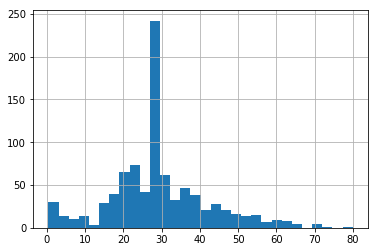

In [391]:
titanic_num_temp = titanic_num.copy()
titanic_num["Age"].hist(bins=30)

In [394]:

child = titanic_num["Age"][titanic_num["Age"] < 10]
adult = titanic_num["Age"][(titanic_num["Age"] >= 10) & (titanic_num["Age"] < 55)]
old = titanic_num[titanic_num["Age"] >= 55]["Age"]

child = child.to_frame(name="Child")
adult = adult.to_frame(name="Adult")
old = old.to_frame(name="Old")


titanic_num_temp = pd.concat([titanic_num_temp, child, adult, old], axis=1)
titanic_num_temp.describe().T

#np.ceil(titanic_num["Age"]/15)  # truncando os dados
#titanic_num_temp["Age"].where(titanic_num["Age"] < 100, 100.0, inplace = True) # substituindo os valores maiores que 5 po 5
#titanic_num_temp["Age"].hist()

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.000,512.3292
Male,891.0,0.352413,0.477990,0.00,0.0000,0.0000,1.000,1.0000
S,891.0,0.725028,0.446751,0.00,0.0000,1.0000,1.000,1.0000
C,891.0,0.188552,0.391372,0.00,0.0000,0.0000,0.000,1.0000
Q,891.0,0.086420,0.281141,0.00,0.0000,0.0000,0.000,1.0000
3rd,891.0,0.551066,0.497665,0.00,0.0000,1.0000,1.000,1.0000


In [395]:
corr_matrix = titanic_num_temp.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Male        0.543351
Name()      0.346496
Mrs         0.344223
NameSize    0.332350
Miss        0.327093
2nd         0.285904
nNames      0.276512
Fare        0.257307
CabB        0.175095
C           0.168240
CabD        0.150716
CabE        0.150716
CabC        0.114652
1st         0.093349
Master      0.085221
Parch       0.081629
CabF        0.057935
Adult       0.050741
Adult       0.039398
CabA        0.022287
Old         0.008698
Q           0.003650
CabG       -0.017955
SibSp      -0.035322
Child      -0.052590
Age        -0.064910
Old        -0.137052
S          -0.149683
Child      -0.270846
3rd        -0.322308
Mr         -0.332993
Name: Survived, dtype: float64